# 1. 原始資料集匯入

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='Microsoft JhengHei'
plt.rcParams['axes.unicode_minus']=False 

pd.set_option("display.max_columns",30) 

df = pd.read_csv('house_data.csv', encoding='utf8') 
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5793,1125069134,20150430T000000,825000.0,3,2.25,2980,86636,1.0,0,0,3,9,2230,750,1989,0,98053,47.6627,-122.003,2980,107157
15651,871001980,20140506T000000,910000.0,3,3.50,3020,4082,2.0,0,0,3,9,2080,940,1954,2004,98199,47.6510,-122.409,2060,5102
2458,2568200140,20140625T000000,739900.0,5,2.50,2980,5377,2.0,0,0,3,9,2980,0,2006,0,98052,47.7074,-122.101,3150,6593
7156,1604601155,20141208T000000,180000.0,3,1.00,780,3540,1.0,0,0,2,6,780,0,1920,0,98118,47.5650,-122.291,1260,3540
1387,616000160,20141210T000000,381000.0,3,2.00,1770,14400,1.0,0,0,4,8,1770,0,1959,0,98166,47.4150,-122.337,1900,14400


# 2. 建立回歸

In [19]:

train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))

Average Price for Test Data: 539823.330


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


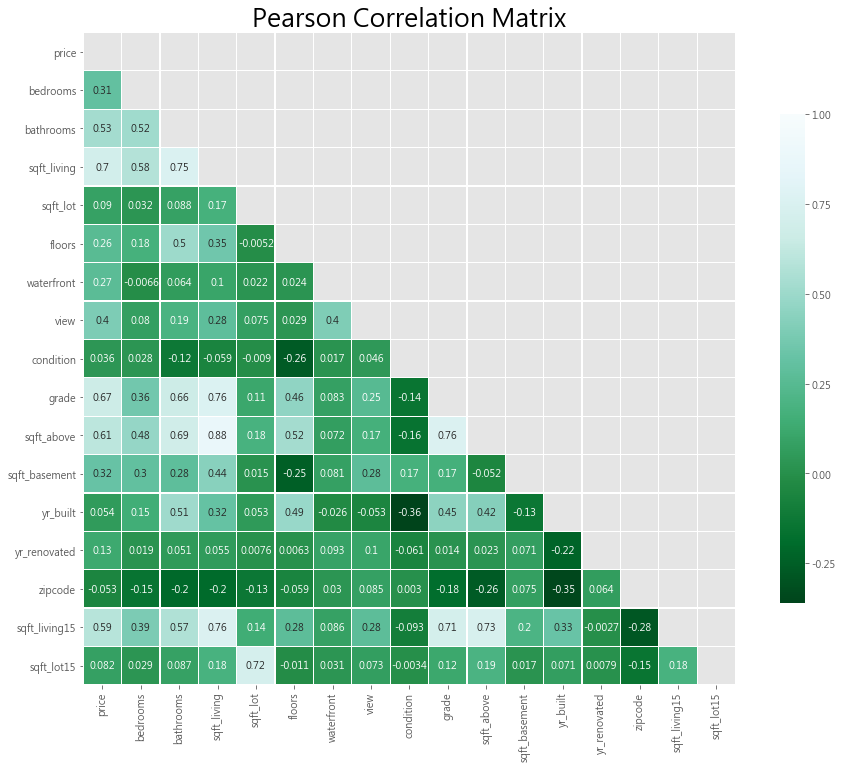

In [5]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront','view','condition','grade','sqft_above','sqft_basement',
            'yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75});

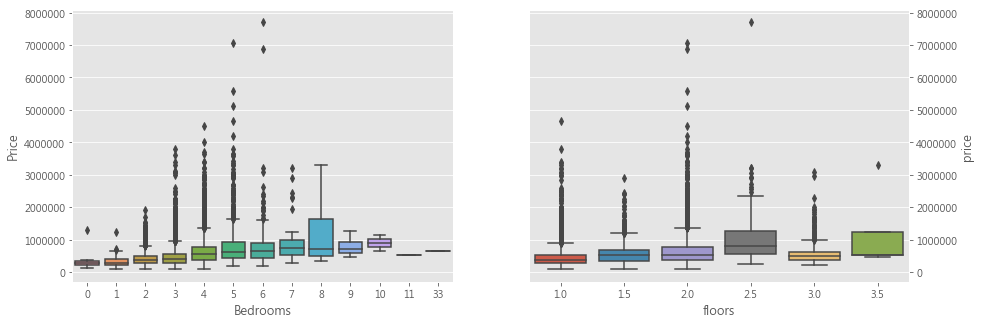

In [24]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'], ax=axes[0])
sns.boxplot(x=train_data['floors'],y=train_data['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


